1. Исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

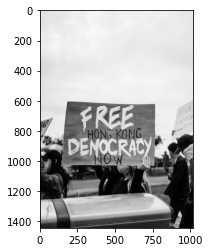

In [2]:
image = cv.imread("hong.png", 0)
plt.imshow(image, cmap="gray")

In [3]:
sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=5)

sobelxy = np.sqrt(sobelx**2 + sobely**2)

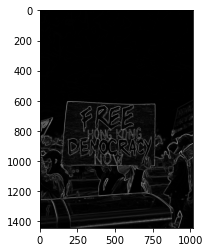

In [4]:
plt.imshow(sobelxy, cmap="gray")

2. На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

In [34]:
def apply_filter(image, filter_type, **kwargs):
    if filter_type == 'blur':
        kernel_size = kwargs.get('kernel_size')
        return cv.blur(image, (kernel_size, kernel_size))
    elif filter_type == 'noise_reduction':
        kernel_size = kwargs.get('kernel_size')
        return cv.medianBlur(image, kernel_size)
    elif filter_type == 'edge_detection':
        threshold1 = kwargs.get('threshold1')
        threshold2 = kwargs.get('threshold2')
        return cv.Canny(image, threshold1, threshold2)
    else:
        return image

def update_image():
    global image, filter_type, kwargs
    
    filtered_image = apply_filter(image.copy(), filter_type, **kwargs)
    cv.imshow('Image Filter', filtered_image)

def on_trackbar_change(value):
    global kwargs
    
    if filter_type == 'blur' or filter_type == 'noise_reduction':
        kwargs['kernel_size'] = value if value % 2 == 1 and value > 0 else value + 1
    else:
        kwargs['threshold1'] = value if value % 2 == 1 else value + 1
    
    update_image()

def on_trackbar_change_second_val(value2):
    global kwargs
    
    if filter_type == 'edge_detection':
        kwargs['threshold2'] = value2
    
    update_image()

def on_checkbox_change(value):
    global filter_type, kwargs
    
    if value == 0:
        filter_type = 'blur'
        kwargs = {'kernel_size': 1}
    elif value == 1:
        filter_type = 'noise_reduction'
        kwargs = {'kernel_size': 1}
    else:
        filter_type = 'edge_detection'
        kwargs = {'threshold1': 0, 'threshold2': 0}
    
    update_image()

image = cv.imread('hong.png')
height, width = image.shape[:2]
# Создание окна
cv.namedWindow('Image Filter', cv.WINDOW_NORMAL)
cv.resizeWindow('Image Filter', width // 2, height // 2) 

# Создание trackbar для типа фильтра
cv.createTrackbar('Filter Type', 'Image Filter', 0, 2, on_checkbox_change)

# Создание trackbar для параметра фильтра
cv.createTrackbar('Parameter', 'Image Filter', 0, 255, on_trackbar_change)

# Создание trackbar для второго параметра фильтра
# если filter_type = 'edge_detection' будет функционировать
cv.createTrackbar('Parameter2', 'Image Filter', 0, 255, on_trackbar_change_second_val)


# Инициализация типа фильтра и его параметра
filter_type = 'blur'
kwargs = {'kernel_size': 1}

update_image()

cv.waitKey(0)
cv.destroyAllWindows()

3. К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом

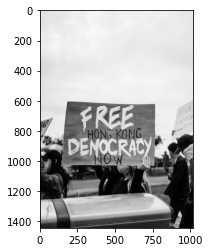

In [7]:
image = cv.imread("hong.png", 0)
plt.imshow(image, cmap="gray")

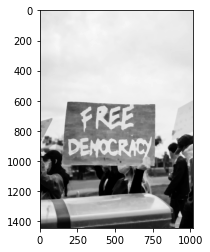

In [8]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (10, 10))
image_res = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
plt.imshow(image_res, cmap="gray")